# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

Data Validation: First, we need to load the provided data file and inspect the dataset in order to verify the integrity of the data and identify any necessary cleaning steps for each column. This can include checking for missing values, inconsistent data types, presence of outliers, etc.

In [81]:
import pandas as pd

# Reading the data file as a pandas dataframe
df = pd.read_csv('product_sales.csv')

# Display the first 5 rows of the dataframe
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


The data contains the following columns:

**week**: The week on which a sales interaction occurred
**sales_method**: The method by which the sale was made. This could be email, call, or a combination of both (Email + Call)
**customer_id**: A unique identifier for each customer
**nb_sold**: The number of units/items sold
**revenue**: The revenue generated by the sale
**years_as_customer**: The number of years for which the individual has been a customer
**nb_site_visits**: The number of times the customer visited the website
**stat**e: The state in which the customer resides

Now, let's perform the data validation step and evaluate these columns for inconsistencies and other potential issues. We'll check the following:

Missing values in each column
Data types for each column
Presence of any notable outliers or inconsistent values (e.g., negative values where they are not expected, etc.)

In [82]:
# Checking the summary statistics of the dataset
df.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


Here are some initial findings related to data validation:

**week**: The weeks range from 1 to 6. No missing or irregular values.

**sales_method**: There are 5 unique sales methods used and no missing values. However, we need to confirm the details of different methods.

**customer_id**: All customer IDs are unique and there are no missing ids, so this column is clean.

**nb_sold**: The number of units sold ranges from 6 to 16. No missing or invalid entries here.

**revenue**: The revenue column seems to have missing values as its count is less than the total number of entries. We'll need to address this.

**years_as_customer**: The number of years as a customer varies significantly, ranging from 0 to 63 years. There seem to be no issues in this field.

**nb_site_visits**: Number of site visits ranges from 5 to 41. No missing or irregular values.

**state**: All entries seem to be valid US states with no missing values.

Next, let's check the sales methods to clarify this column.

In [83]:
# Checking the unique values in the 'sales_method' column
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

The unique values in the 'sales_method' column are:

'Email'
'Email + Call'
'Call'
'em + call'
'email'
It appears that there is some inconsistency in this column which could lead to misinterpretation of data. For example, 'em + call' and 'Email + Call' represent the same sales method but are written differently. Similarly, 'Email' and 'email' should be merged into a single category.

So the data cleaning required for this column is to standardize the sales method terminology.

Let's go ahead and fix the 'sales_method' column.

In [84]:
# Standardizing the 'sales_method' column
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Checking the unique values in 'sales_method' after cleaning
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

The sales method terminology has been standardized. Now, the 'sales_method' column only includes the following unique values:

'Email'
'Email + Call'
'Call'
Next, let's tackle the missing values in the 'revenue' column. We'll investigate by checking the percentage of missing values. If a relatively high percentage of values are missing, we might want to consider imputing them, removing the rows with missing values, or handling them appropriately based on the rest of the analysis. Let's find out the percentage of missing values in the 'revenue' column.

In [85]:
# Calculate the percentage of missing values in the 'revenue' column
missing_revenue_percentage = df['revenue'].isnull().sum() * 100 / len(df)
missing_revenue_percentage

7.16

The 'revenue' column has about 7.16% missing values.

In a practical business scenario, it is important to understand why these values are missing before deciding on an imputation strategy. Depending on the nature of missingness, the missing values could be replaced with the calculated averages, median, or any other domain-specific value.

Or, if these missing values do not significantly affect our analysis, we could leave them as is or remove the corresponding rows. Given that the missing values amount to a relatively smaller percentage of our data, removing these rows would not result in a significant loss of information.

For now, let's move on to the exploratory analysis. We can decide about these missing values based on the specific analyses that we'll be conducting.

Let's generate visuals to illustrate the distribution of single variables, such as 'sales_method', 'nb_sold', 'revenue', 'years_as_customer', and 'nb_site_visits'. This would aid in demonstrating the characteristics of data. We'll use histograms for numerical variables and bar plots for the categorical variable 'sales_method'.

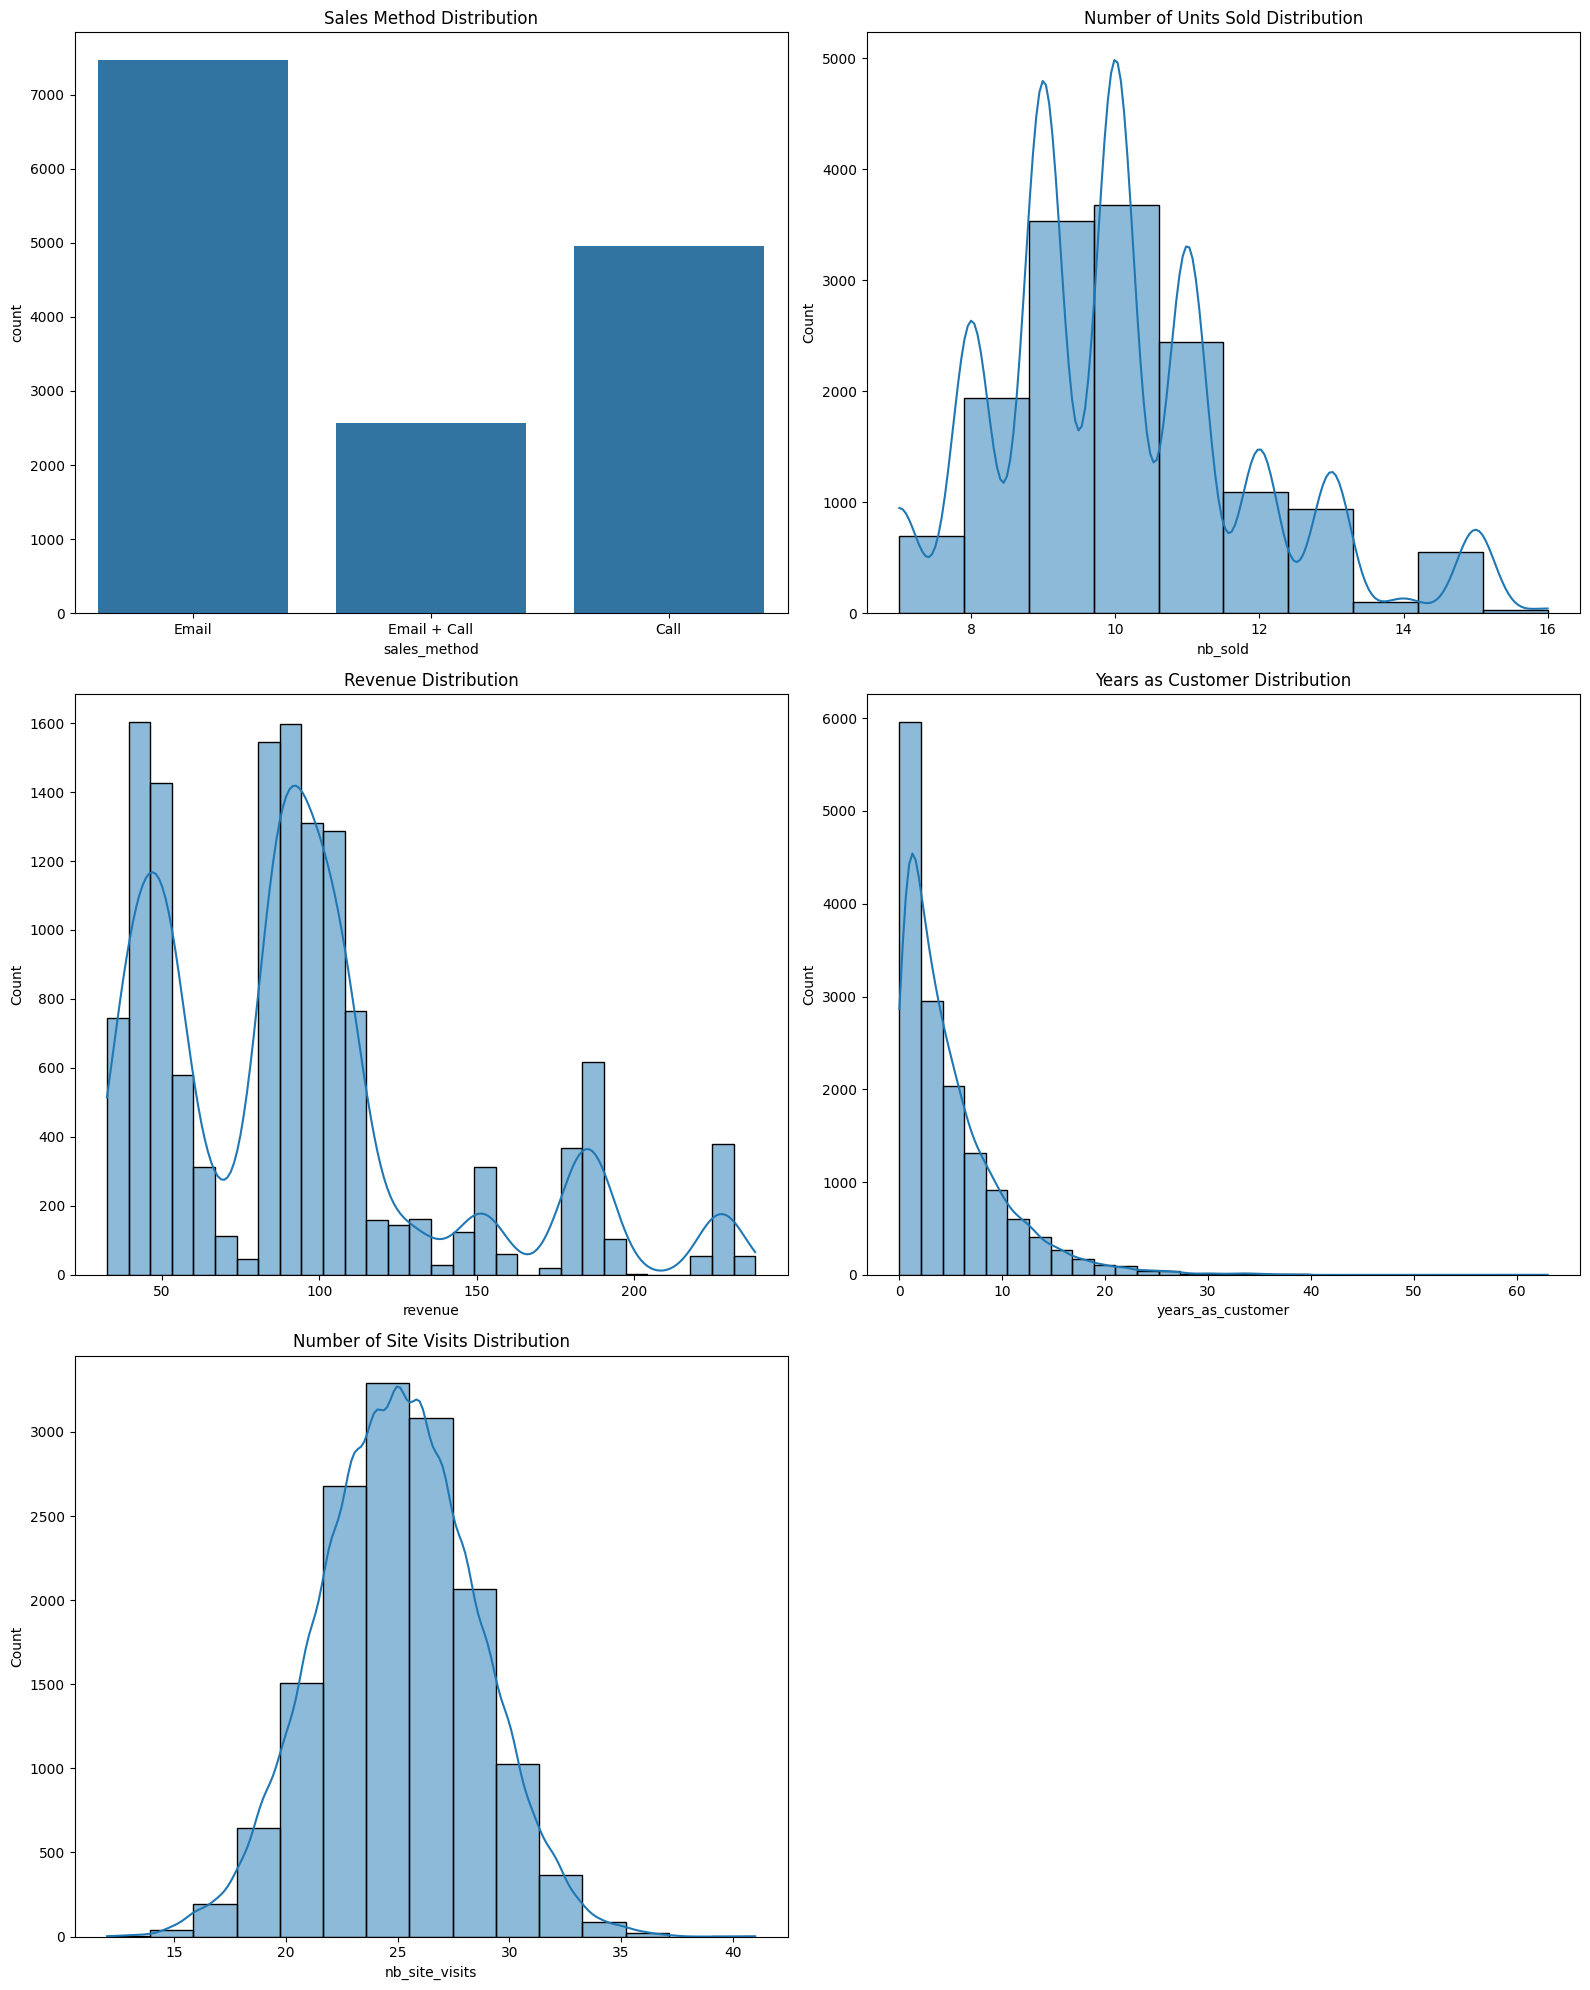

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes for our subplots
fig, ax = plt.subplots(3, 2, figsize=(16, 20))

# Data distribution of 'sales_method'
sns.countplot(data=df, x='sales_method', ax=ax[0, 0])
ax[0, 0].set_title('Sales Method Distribution')

# Data distribution of 'nb_sold'
sns.histplot(data=df, x='nb_sold', bins=10, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Number of Units Sold Distribution')

# Data distribution of 'revenue'
sns.histplot(data=df, x='revenue', bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Revenue Distribution')

# Data distribution of 'years_as_customer'
sns.histplot(data=df, x='years_as_customer', bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Years as Customer Distribution')

# Data distribution of 'nb_site_visits'
sns.histplot(data=df, x='nb_site_visits', bins=15, kde=True, ax=ax[2, 0])
ax[2, 0].set_title('Number of Site Visits Distribution')

# Removing the unused subplot
fig.delaxes(ax[2,1])

plt.tight_layout()
plt.show()

Here are the observations from the generated histograms and bar plot which showcase the distribution of single variables in the dataset:

The Sales Method Distribution plot shows that the 'Email' method is used more frequently than the other methods present in the dataset. The 'Call' and 'Email + Call' methods have been used roughly equally by the sales team.

1. The Number of Units Sold Distribution plot shows that the most common number of units sold hovers around the 10 mark. The distribution is almost symmetrical but we can notice that it has a slight right skew, meaning a few transactions with a higher number of units sold are pulling the average upwards.

2. The Revenue Distribution plot presents a right-skewed distribution as well. It suggests that a majority of transactions generate a revenue of around 75-100. However, there are transactions earning significantly higher revenue that are less frequent but do influence the overall distribution.

3. The Years as Customer Distribution plot depicts a right-skewed distribution. Many customers have been with the company for a short period of time (around 0-10 years), but the company does have a substantive number of long-standing customers, extending to over 60 years.

4. The Number of Site Visits Distribution plot suggests that most customers visit the website about 20 to 30 times, with the most common number of visits being around 25.

These findings give us a sense of the general characteristics of the data, and can help guide subsequent analyses.

Next, let's create a graphic showing two or more variables to represent the relationship between features. For instance, we can examine the relationship between the revenue generated and the sales method used, or the number of units sold and the number of years as a customer. Let's start with the relationship between revenue and the sales method.

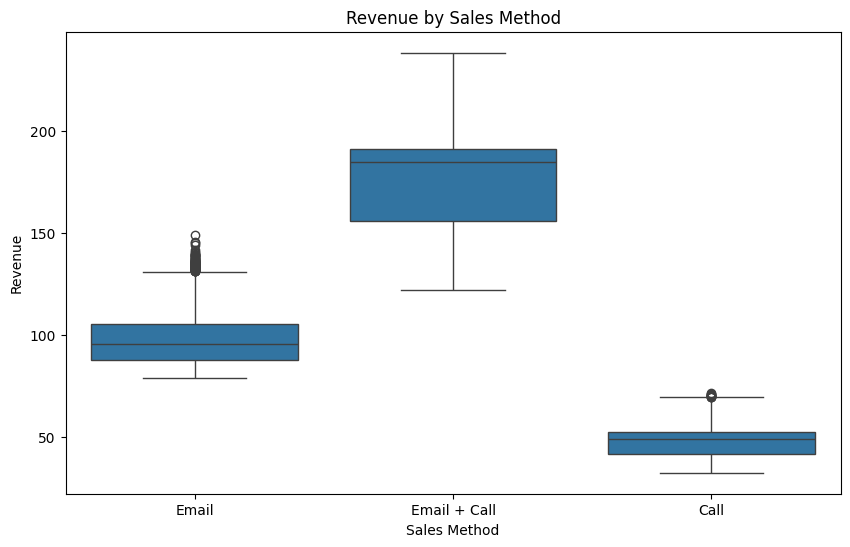

In [87]:
# Plotting a boxplot to visualize the relationship between sales method and the revenue generated
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sales_method', y='revenue')
plt.title('Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

From the Revenue by Sales Method box plot, we can notice that the median revenue for the 'Call' method is slightly higher than the other two methods. However, there are outliers in each of these categories which means that there are some transactions that deviate significantly from the average revenue per sales method.

Specifically:

'Email + Call' method results in the widest spread of revenue, with some transactions generating significantly high revenue.

The 'Email' method has a smaller spread than 'Email + Call' but larger than 'Call'. The median revenue generated is also lower in comparison to 'Call' but higher than 'Email + Call'.

Using the 'Call' method results in the smallest spread of revenue and comparatively fewer outliers. It seems to generate a higher median revenue than the other two methods.

This analysis gives insights into the effectiveness of different sales strategies.

In addition, to understand customer behavior, it'll be interesting to analyze the relationship between two or more variables involving 'nb_sold', 'years_as_customer', and 'nb_site_visits'.

Let's create a scatter plot with a trend line (using seaborn's regplot) between 'years_as_customer' and 'nb_sold'. This will help us understand if longtime customers tend to buy more products.

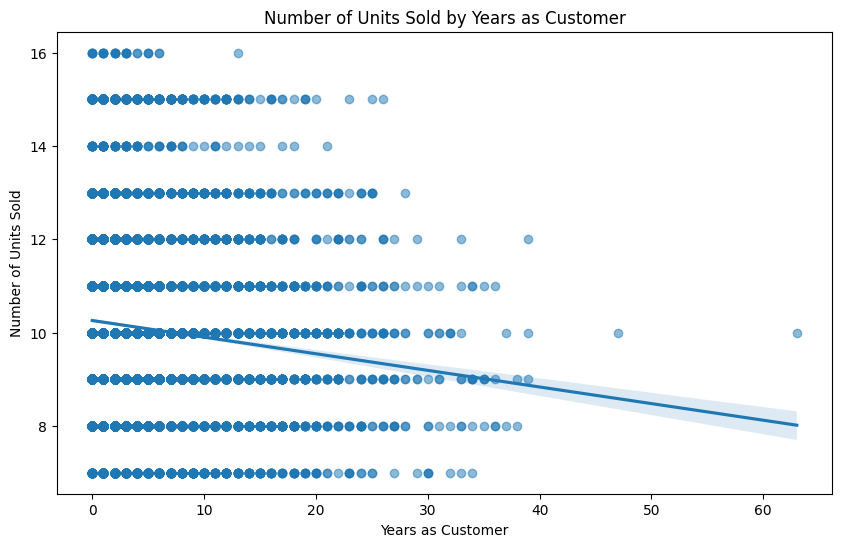

In [88]:
# Scatterplot to visualize the relationship between 'years_as_customer' and 'nb_sold'
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='years_as_customer', y='nb_sold', scatter_kws={'alpha':0.5})
plt.title('Number of Units Sold by Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Number of Units Sold')
plt.show()

The **Number of Units Sold by Years as Customer** scatter plot with a trend line does not indicate a clear linear relationship between these variables.

This suggests that the number of years a person has been with the company ('years_as_customer') does not seem to directly influence the number of units they buy ('nb_sold'). The plot shows a broad range of 'nb_sold' values for every value of 'years_as_customer', with the bulk of the points falling in the range of 0-10 years as a customer and around 8-12 units sold.

In order to gain more insights, it would be wise to conduct a similar analysis for other pairs of variables. Still, this scatter plot gives us an important perspective on customer behavior.

Next, based on the exploratory analysis we've done so far, let's define a potential business metric that the business can use to monitor their performance. It is often useful to look at average revenue per unit sold. This way, the company can aim to increase the average revenue per unit by focusing on selling more high-value products or by upselling/cross-selling products to increase the total value of each transaction. Let's calculate this metric based on the available data.

In [91]:
# Calculate average revenue per unit sold
avg_revenue_per_unit = df['revenue'].sum() / df['nb_sold'].sum()
avg_revenue_per_unit

8.647702849210022

Let's start by visualizing the distribution across states. For simplicity, we'll focus on the top 10 states with the most records in our dataset.

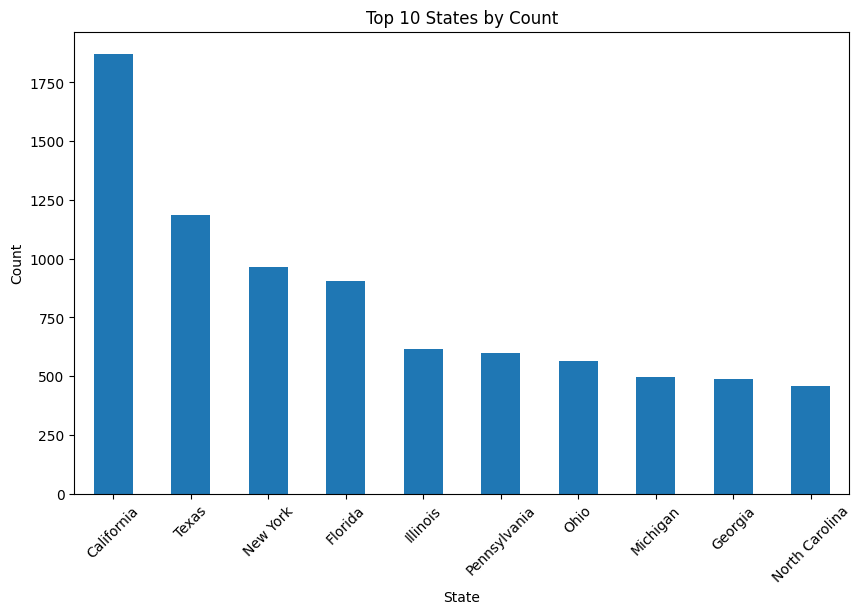

In [92]:
# Plotting a bar plot for 10 states with the highest count
plt.figure(figsize=(10, 6))
df['state'].value_counts()[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States by Count')
plt.xticks(rotation=45)
plt.show()

The **Top 10 States by Count** bar plot illustrates that 'California', 'Texas', and 'New York' are the states with the most records in our dataset. It means these states likely have the most customers.

This information can be helpful for the company to understand where their largest markets are based. If the company is planning any location-specific marketing campaigns or strategies, these states could be of primary interest.

Next, let's analyze the 'week' column to identify any weekly trends in the data. Since 'week', 'nb_sold', 'revenue', and 'nb_site_visits' are numeric variables, we can calculate their mean values for each week and observe the trends over the weeks.

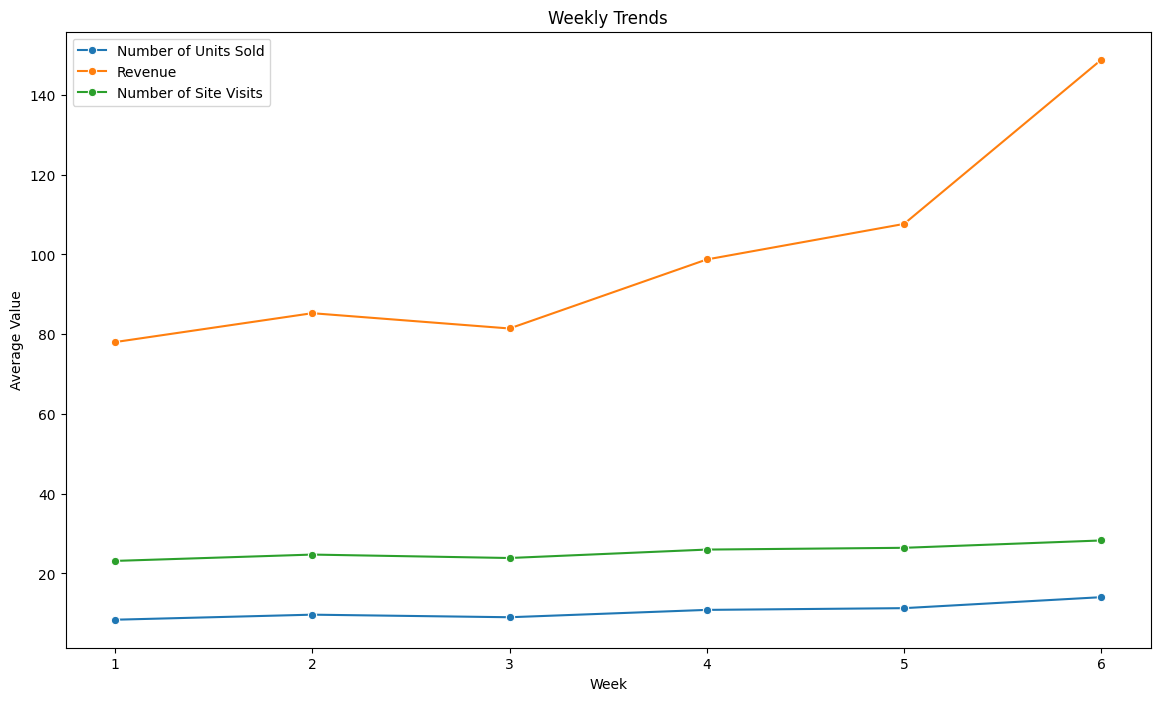

In [93]:
# Group the data by 'week' and calculate the mean of 'nb_sold', 'revenue', and 'nb_site_visits'
week_trend = df.groupby('week')[['nb_sold', 'revenue', 'nb_site_visits']].mean().reset_index()

# Plotting the trends
plt.figure(figsize=(14, 8))

# Trend of average number of units sold per week
sns.lineplot(data=week_trend, x='week', y='nb_sold', marker='o', label='Number of Units Sold')

# Trend of average revenue per week
sns.lineplot(data=week_trend, x='week', y='revenue', marker='o', label='Revenue')

# Trend of average number of site visits per week
sns.lineplot(data=week_trend, x='week', y='nb_site_visits', marker='o', label='Number of Site Visits')

plt.title('Weekly Trends')
plt.xlabel('Week')
plt.ylabel('Average Value')
plt.legend()
plt.show()

The Weekly Trends line plot conveys the following observations:
**
Number of Units Sold**: There is a slight upward trend in the average number of units sold over the weeks. This suggests that sales have been slightly improving week by week.

**Revenue**: The average revenue shows a more noticeable upward trend. This may be a result of selling more high-value products or successful upselling/cross-selling practice over time, leading to an increase in the total transaction value.

**Number of Site Visits**: There is a downward trend in the average number of site visits per week. This may indicate that though customers are visiting the site fewer times, they are making more purchases or higher-value purchases when they do visit.

These observations can guide the company in identifying patterns around customer behavior and sales efficiency, and can provide initial points for further investigation.

For an additional valuable insight, we can examine the relationship between 'nb_site_visits' and 'revenue' to see if visiting the site more frequently leads to higher revenue. Let's generate a scatter plot of 'nb_site_visits' against 'revenue'.

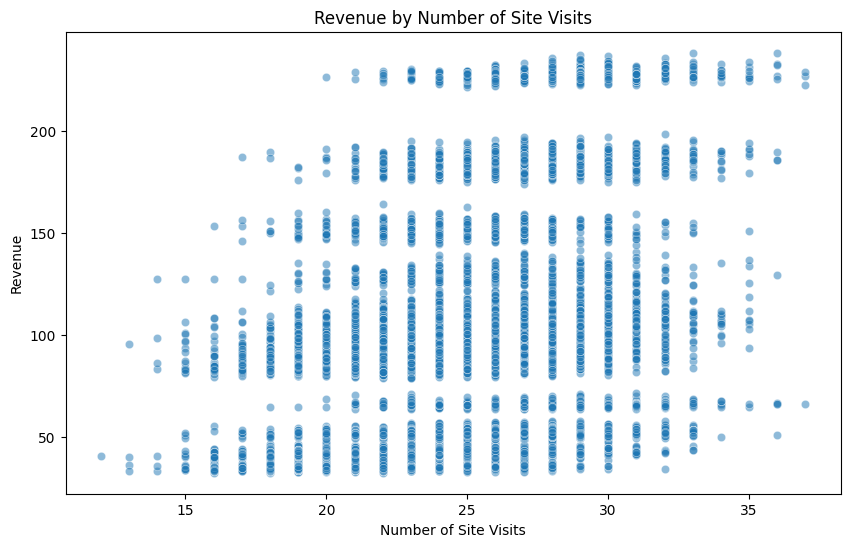

In [94]:
# Scatterplot to visualize the relationship between 'nb_site_visits' and 'revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nb_site_visits', y='revenue', alpha=0.5)
plt.title('Revenue by Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.show()

The Revenue by Number of Site Visits scatter plot suggests that there is no clear relationship between the number of site visits and the revenue generated.

This implies that simply visiting the site more often does not necessarily result in higher revenues. The business may need to consider strategies for improving conversion rates (i.e., turning site visits into purchases) and increasing the value of each visit (i.e., promoting higher-value products or successful upselling/cross-selling).

**- Sales Method**

The 'Email' sales method is used most frequently, but the 'Call' method appears to result in a higher median revenue. This suggests the 'Call' method might be more effective in terms of generating revenue. The company should further analyze the cost and effectiveness of the different sales methods and make adjustments if necessary.

**- State**

The states with the most customers are California, Texas, and New York. The company could consider targeting more resources or tailored strategies towards these states, given their large customer base.

**- Weekly Trends**

There is an upward trend in the average number of units sold and revenue per week, suggesting an improvement in sales over time. However, the average number of site visits per week is decreasing. The company could benefit from initiatives to improve website engagement and conversion rates.

**- Number of Site Visits**

The scatter plot suggests that simply having more website visits does not necessarily result in higher revenues. Strategies to enhance the value of each site visit could be beneficial. The company could look into improving their online user experience, offering personalized product recommendations, and having effective Call-To-Actions (CTAs) that can increase conversion rates.

**- Years as Customer vs. Number of Units Sold**

Our analysis suggested that the number of years a person has been a customer does not directly influence the number of units they purchase. The company might want to consider introducing loyalty programs or personalized marketing efforts to motivate long-time customers to make more or larger purchases.

**- Key Performance Indicator**

The average revenue per unit sold was identified as a potential KPI. The current average revenue per unit sold is approximately $8.65. The company should monitor this metrics to assess their sales performance and aim to increase it by selling more high-valued products or by upselling/cross-selling products.